## Part 1. Data Pre-Processing

In [1]:
import pandas as pd

In [2]:

loanStats = pd.read_csv('LoanStats_2016Q4.csv', skiprows = 1)
rejectStats = pd.read_csv('RejectStats_2016Q4.csv', skiprows = 1)

C:\Users\Thu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loanStats.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,4500.0,4500.0,4500.0,36 months,12.74%,151.06,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,9300.0,9300.0,9300.0,36 months,8.24%,292.46,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,21500.0,21500.0,21500.0,36 months,11.39%,707.86,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,14400.0,14400.0,14400.0,60 months,7.99%,291.92,A,A5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,11100.0,11100.0,11100.0,36 months,5.32%,334.28,A,A1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rejectStats.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,2900.0,2016-10-01,Medical expenses,661.0,3.71%,112xx,NY,< 1 year,0
1,10000.0,2016-10-01,major_purchase,NaN,0%,711xx,LA,< 1 year,0
2,8500.0,2016-10-01,debt_consolidation,NaN,53.71%,759xx,TX,NaN,0
3,5000.0,2016-10-01,vacation,NaN,1.92%,982xx,WA,5 years,0
4,5000.0,2016-10-01,debt_consolidation,NaN,22.53%,928xx,CA,< 1 year,0


In [5]:
rejectStats.Risk_Score.hist()

In [6]:
rejectStats.Risk_Score.isna().sum()

831675

In [7]:
print(loanStats.shape)
print(loanStats.columns)

(103548, 144)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)


In [8]:
print(rejectStats.shape)
print(rejectStats.columns)

(1404490, 9)
Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')


In [9]:
loanStats[-3:]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
103545,NaN,NaN,14000.0,14000.0,14000.0,60 months,14.49%,329.33,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
103546,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103547,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop last two rows

In [10]:
loanStats = loanStats.drop(loanStats.index[-2:])

Drop first two columns since they are empty

In [11]:
loanStats = loanStats.drop(['id', 'member_id'], axis = 1)

In [12]:
print(loanStats.shape)
print(loanStats.columns)
print(rejectStats.shape)
print(rejectStats.columns)

(103546, 142)
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=142)
(1404490, 9)
Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')


In [13]:
print(loanStats['loan_amnt'].describe())
print(rejectStats['Amount Requested'].describe())

count    103546.000000
mean      14151.435835
std        9215.032376
min        1000.000000
25%        7000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64
count    1.404490e+06
mean     1.293313e+04
std      1.567272e+04
min      0.000000e+00
25%      4.000000e+03
50%      1.000000e+04
75%      2.000000e+04
max      3.000000e+05
Name: Amount Requested, dtype: float64


In [14]:
print(loanStats['title'].value_counts())
print(rejectStats['Loan Title'].value_counts())

Debt consolidation         59749
Credit card refinancing    20528
Home improvement            7393
Other                       7383
Major purchase              2470
Medical expenses            1468
Business                    1216
Car financing               1162
Vacation                     829
Moving and relocation        772
Home buying                  475
Green loan                    97
Name: title, dtype: int64
debt_consolidation         359782
Debt consolidation         324415
other                      146389
credit_card                 96179
Other                       71882
Credit card refinancing     67381
home_improvement            44136
Home improvement            31054
car                         29480
major_purchase              29301
Car financing               22788
moving                      20836
medical                     20814
Medical expenses            19315
Business Loan               18575
Moving and relocation       17616
Major purchase              17505


There are only 9 columns in reject data, let's try to match loan data with reject data:<br/>
* 'loan_amnt' in loanStats should match with 'Amount Requested' in rejectStats.
* 'issue_d' in loanStats is the issue date, it should be later than 'Application Date' in rejectStats, let's ignore this pair for now.
* 'title' in loanStats should match with 'Loan Title' in rejectStats. However, we need to deal with upper/lower case and space/underscore issues.
* There is no column in loanStats matches with 'Risk_Score' in rejectStats, would be very useful if there was one.
* 'dti' in loanStats matches with 'Debt-To-Income Ratio' in rejectStats.
* 'zip_code' and 'addr_state' in loanStats match with 'Zip Code' and 'State' in rejectStats respectively. Zip codes are only available in first 3 digits, and we might need to get external data for the demographics about the zip code.
* 'emp_length' in loanStats matches with 'Employment Length' in rejectStats.
* 'policy_code' in loanStats matches with 'Policy Code' in rejectStats.

In [15]:
print(loanStats['emp_length'].value_counts())
print(rejectStats['Employment Length'].value_counts())

10+ years    35981
2 years       9652
3 years       8244
< 1 year      7591
1 year        6707
5 years       6292
4 years       6249
6 years       4786
8 years       3951
9 years       3870
7 years       3346
Name: emp_length, dtype: int64
< 1 year     1022412
5 years       274322
10+ years      16782
2 years         5248
3 years         4502
1 year          4389
4 years         3314
6 years         2494
8 years         1953
7 years         1918
9 years         1586
Name: Employment Length, dtype: int64


In [16]:
print(loanStats['policy_code'].value_counts())
print(rejectStats['Policy Code'].value_counts())

1.0    103546
Name: policy_code, dtype: int64
0    1403661
2        829
Name: Policy Code, dtype: int64


However, policy code is useless since it carries different meaning in the two datasets, so we should ignore this pair of columns.<br/>
Let's now build two new dataframes, and keep their columns consistent.

In [17]:
approved = pd.DataFrame()
rejected = pd.DataFrame()

Copy values from 'loan_amnt' and 'Amount Requested' directly to the new dataframes

In [18]:
approved['amount'] = loanStats['loan_amnt']
rejected['amount'] = rejectStats['Amount Requested']

Using lambda functions to convert strings, first make all characters lower cases, and split them by space, then join them using '\_'. While joining, remove words like 'and', 'expenses', 'financing', 'loan', 'refinancing', as these words are not important in reasons for loans. To further consolidate the reasons, we merge 'housing' to 'home\_buying', 'moving' to 'moving\_relocation', 'renewable\_energy' to 'green', and 'small\_business' to 'business'.

In [19]:
stop_words = ['and', 'expenses', 'financing', 'loan', 'refinancing']
approved['reason'] = loanStats['title'].apply(lambda x: 'other' if type(x) != str else '_'.join([i for i in x.lower().split() if i not in stop_words]))
rejected['reason'] = rejectStats['Loan Title'].apply(lambda x: 'other' if type(x) != str else '_'.join([i for i in x.lower().split() if i not in stop_words]))
convert = {'house': 'home_buying', 'moving': 'moving_relocation', 'renewable_energy': 'green', 'small_business': 'business'}
rejected['reason'] = rejected['reason'].apply(lambda x: convert[x] if x in convert else x)

Copy values from 'dti' and 'Debt-To-Income Ratio', however, to identify Not-a-Number floats, we test x == x, in it's a NaN, we set it to the maximum in the dataset.

In [20]:
approved['debt_to_income'] = loanStats['dti'].apply(lambda x: max(0.0, min(x / 100, 1.0)) if x == x else 1.0)
rejected['debt_to_income'] = rejectStats['Debt-To-Income Ratio'].apply(lambda x: max(0.0, min(float(x[:-1]) / 100, 1.0)))

Keep the first 3 digits of the zip codes since the last 2 digits are masked, however, it is unnecessary to convert them to numbers.

In [21]:
approved['zip3'] = loanStats['zip_code'].apply(lambda x: x[:3] if type(x) == str else 'N/A')
rejected['zip3'] = rejectStats['Zip Code'].apply(lambda x: x[:3] if type(x) == str else 'N/A')
approved['state'] = loanStats['addr_state']
rejected['state'] = rejectStats['State']

Convert the employment length to numerical values, if it is not specified, or less than a year, we take them as 0.

In [22]:
approved['employ_length'] = loanStats['emp_length'].apply(lambda x: 0 if type(x) != str or x[:3] == '< 1' else int(x[:2]))
rejected['employ_length'] = rejectStats['Employment Length'].apply(lambda x: 0 if type(x) != str or x[:3] == '< 1' else int(x[:2]))

The column 'reason' is now the only nominal column, we may use function get\_dummies, drop 'other' is recommended since 'reason\_=\_other' is fuzzy, and should be expressed by 0 in all other reason columns.

In [23]:
approved = pd.concat([approved, pd.get_dummies(approved['reason'], prefix = 'reason', prefix_sep = '_=_').drop('reason_=_other', axis = 1)], axis = 1).drop('reason', axis = 1)
rejected = pd.concat([rejected, pd.get_dummies(rejected['reason'], prefix = 'reason', prefix_sep = '_=_').drop('reason_=_other', axis = 1)], axis = 1).drop('reason', axis = 1)

Add the response column to the two dataframes.

In [24]:
approved['approved'] = 1
rejected['approved'] = 0

Convert the two dataframes to numpy arrays.

In [25]:
data_pos = approved.drop(['zip3', 'state'], axis = 1).values
data_neg = rejected.drop(['zip3', 'state'], axis = 1).values

In [26]:
print(data_pos.shape)
print(data_neg.shape)

(103546, 15)
(1404490, 15)


In [27]:
data_pos

array([[4.500e+03, 2.993e-01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [9.300e+03, 1.612e-01, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.150e+04, 2.018e-01, 1.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [4.000e+04, 1.275e-01, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.400e+04, 1.830e-01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.400e+04, 2.336e-01, 1.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [28]:
approved.head(10)

,amount,debt_to_income,zip3,state,employ_length,reason_=_business,reason_=_car,reason_=_credit_card,reason_=_debt_consolidation,reason_=_green,reason_=_home_buying,reason_=_home_improvement,reason_=_major_purchase,reason_=_medical,reason_=_moving_relocation,reason_=_vacation,approved
0,4500.0,0.2993,531,WI,6,0,0,1,0,0,0,0,0,0,0,0,1
1,9300.0,0.1612,481,MI,9,0,0,0,1,0,0,0,0,0,0,0,1
2,21500.0,0.2018,730,OK,10,0,0,0,1,0,0,0,0,0,0,0,1
3,14400.0,0.0660,070,NJ,9,0,0,0,0,0,0,1,0,0,0,0,1
4,11100.0,0.1891,902,CA,3,0,0,1,0,0,0,0,0,0,0,0,1
5,13400.0,0.3294,951,CA,5,0,0,0,0,0,0,1,0,0,0,0,1
6,10000.0,0.2993,703,LA,0,0,0,1,0,0,0,0,0,0,0,0,1
7,13000.0,0.1891,461,IN,10,0,0,1,0,0,0,0,0,0,0,0,1
8,10000.0,0.1624,927,CA,10,0,0,0,0,0,0,0,0,0,0,0,1
9,18000.0,0.3076,329,FL,2,0,0,0,1,0,0,0,0,0,0,0,1


In [29]:
rejected.head(10)

,amount,debt_to_income,zip3,state,employ_length,reason_=_business,reason_=_car,reason_=_credit_card,reason_=_debt_consolidation,reason_=_green,reason_=_home_buying,reason_=_home_improvement,reason_=_major_purchase,reason_=_medical,reason_=_moving_relocation,reason_=_vacation,approved
0,2900.0,0.0371,112,NY,0,0,0,0,0,0,0,0,0,1,0,0,0
1,10000.0,0.0000,711,LA,0,0,0,0,0,0,0,0,1,0,0,0,0
2,8500.0,0.5371,759,TX,0,0,0,0,1,0,0,0,0,0,0,0,0
3,5000.0,0.0192,982,WA,5,0,0,0,0,0,0,0,0,0,0,1,0
4,5000.0,0.2253,928,CA,0,0,0,0,1,0,0,0,0,0,0,0,0
5,20000.0,0.2831,700,LA,0,0,0,0,1,0,0,0,0,0,0,0,0
6,10000.0,0.4210,794,TX,0,0,0,0,1,0,0,0,0,0,0,0,0
7,5000.0,0.5220,185,PA,0,0,0,0,1,0,0,0,0,0,0,0,0
8,7500.0,0.1520,310,GA,2,0,0,0,1,0,0,0,0,0,0,0,0
9,2500.0,0.0074,070,NJ,5,0,0,0,0,0,0,0,0,0,0,1,0


## Part 2. Building Ensemble Models

### 1) Compare Logistic Regression and Naïve Bayes Classifiers

##### Logistic Regression

In [30]:
from sklearn import linear_model, model_selection, metrics
import numpy as np

In [31]:
data = pd.concat([approved, rejected])

In [32]:
data

,amount,debt_to_income,zip3,state,employ_length,reason_=_business,reason_=_car,reason_=_credit_card,reason_=_debt_consolidation,reason_=_green,reason_=_home_buying,reason_=_home_improvement,reason_=_major_purchase,reason_=_medical,reason_=_moving_relocation,reason_=_vacation,approved
0,4500.0,0.2993,531,WI,6,0,0,1,0,0,0,0,0,0,0,0,1
1,9300.0,0.1612,481,MI,9,0,0,0,1,0,0,0,0,0,0,0,1
2,21500.0,0.2018,730,OK,10,0,0,0,1,0,0,0,0,0,0,0,1
3,14400.0,0.0660,070,NJ,9,0,0,0,0,0,0,1,0,0,0,0,1
4,11100.0,0.1891,902,CA,3,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404485,10000.0,0.4126,441,OH,0,0,0,0,1,0,0,0,0,0,0,0,0
1404486,10000.0,0.0148,207,MD,5,0,0,0,0,0,0,0,0,0,1,0,0
1404487,1200.0,0.1026,914,CA,0,0,0,0,0,0,0,0,0,0,0,0,0
1404488,25000.0,0.1771,880,NM,0,0,0,0,1,0,0,0,0,0,0,0,0


In [33]:
data.columns

Index(['amount', 'debt_to_income', 'zip3', 'state', 'employ_length',
       'reason_=_business', 'reason_=_car', 'reason_=_credit_card',
       'reason_=_debt_consolidation', 'reason_=_green', 'reason_=_home_buying',
       'reason_=_home_improvement', 'reason_=_major_purchase',
       'reason_=_medical', 'reason_=_moving_relocation', 'reason_=_vacation',
       'approved'],
      dtype='object')

In [34]:
x = data[['amount', 'debt_to_income','employ_length',
       'reason_=_business', 'reason_=_car', 'reason_=_credit_card',
       'reason_=_debt_consolidation', 'reason_=_green', 'reason_=_home_buying',
       'reason_=_home_improvement', 'reason_=_major_purchase',
       'reason_=_medical', 'reason_=_moving_relocation', 'reason_=_vacation']]
Y = data['approved']

Because data is imbalanced, we do stratified sampling.

In [36]:
x_train, x_test, Y_train, Y_test = model_selection.train_test_split(x, Y, test_size = 0.2, stratify = Y, random_state = 2020)

In [69]:
# Because data is imbalanced so we choose the balanced class weight option
estimator = linear_model.LogisticRegression(class_weight = 'balanced')
estimator.fit(x_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
Y_pred = estimator.predict(x_test)

In [53]:
cf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
AUC_ROC = metrics.roc_auc_score(Y_test, Y_pred)

report = """
The evaluation report is:
Confusion Matrix:
{}
Accuracy: {}
Precision: {}
Recall: {}
AUC under ROC: {}
""".format(cf_matrix, accuracy, precision, recall, AUC_ROC)
print(report)


The evaluation report is:
Confusion Matrix:
[[279103   1796]
 [ 17501   3208]]
Accuracy: 0.9360196016020795
Precision: 0.6410871302957634
Recall: 0.15490849389154474
AUC under ROC: 0.5742573683523989



##### Choosing beta:
I have tried several betas for the models and found that for larger beta, Recall is higher but Precision is lower. Precision = True approval / (True approval + False approval). Recall = True approval / (True approval + False reject). In this case, lower Precision is more costly compared to lower Recall because approving loan for a non-credit worthly person means that the company has higher default risk, which can easily wipe out revenue earned from other customers. Hence, we want higher Precision. I choose beta = 0.5 so Recall is about 0.7 times (sqrt(0.5)) as important as Precision.


In [54]:
beta = 0.5

In [55]:
F_beta = 1/((1/precision + (beta**2)*(1/recall))/(1+beta**2))
F_beta

0.3938612645794966

In [ ]:
estimator = linear_model.LogisticRegression(class_weight = 'balanced')

In [63]:
Y_pred_proba = estimator.predict_proba(x_test)[:,1]

In [64]:
precision_recall = metrics.precision_recall_curve(Y_test,Y_pred_proba)
precision_recall

(array([0.06888282, 0.06900321, 0.06900344, ..., 0.5       , 0.        ,
        1.        ]),
 array([1.00000000e+00, 9.99951712e-01, 9.99951712e-01, ...,
        4.82881839e-05, 0.00000000e+00, 0.00000000e+00]),
 array([0.17134503, 0.17139376, 0.17141469, ..., 0.95640673, 0.95672045,
        0.95711521]))

In [65]:
AUC_ROC = metrics.roc_auc_score(Y_test,Y_pred_proba)
AUC_ROC

0.8408669069889603

In [66]:
prec_rec = pd.DataFrame({'precision':precision_recall[0][:-1], 'recall':precision_recall[1][:-1],'threshold':precision_recall[2]})

In [67]:
prec_rec['F_beta'] = 1/((1/prec_rec['precision'] + (beta**2)*(1/prec_rec['recall']))/(1+beta**2))

In [68]:
prec_rec.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
196140,0.672627,0.483172,0.753240,0.623714
196139,0.672582,0.483172,0.753238,0.623683
196141,0.672605,0.483123,0.753290,0.623683
196143,0.672628,0.483075,0.753423,0.623683
196145,0.672651,0.483027,0.753462,0.623683
...,...,...,...,...
210721,0.083333,0.000048,0.955806,0.000241
210720,0.076923,0.000048,0.955757,0.000241
210719,0.071429,0.000048,0.955718,0.000241
210718,0.066667,0.000048,0.955712,0.000241


##### Naives Bayes Classifier

In [70]:
from sklearn import naive_bayes

In [71]:
gnb = naive_bayes.GaussianNB()

In [72]:
gnb.fit(x_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
Y_pred_gnb = gnb.predict(x_test)

In [74]:
print(gnb.class_prior_)

[0.93133697 0.06866303]


In [75]:
print(gnb.class_count_)

[1123591.   82837.]


In [77]:
print('accuracy_gnb:', metrics.accuracy_score(Y_test, Y_pred_gnb))
print('precision_gnb:', metrics.precision_score(Y_test, Y_pred_gnb))
print('recall_gnb:', metrics.recall_score(Y_test, Y_pred_gnb))


accuracy_gnb: 0.9476439616986286
precision_gnb: 0.679856641310708
recall_gnb: 0.44883866917765225


In [78]:
Y_proba_gnb = gnb.predict_proba(x_test)[:,1]

In [79]:
precision_recall_gnb = metrics.precision_recall_curve(Y_test, Y_proba_gnb)

In [80]:
prec_rec_gnb = pd.DataFrame({'precision':precision_recall_gnb[0][:-1], 'recall':precision_recall_gnb[1][:-1],'threshold':precision_recall_gnb[2]})

In [81]:
prec_rec_gnb['F_beta'] = 1/((1/prec_rec_gnb['precision'] + (beta**2)*(1/prec_rec_gnb['recall']))/(1+beta**2))

In [82]:
prec_rec_gnb.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
193961,0.679300,0.489014,0.319460,0.630251
193962,0.679278,0.488966,0.319777,0.630220
193960,0.679254,0.489014,0.319359,0.630220
193963,0.679257,0.488918,0.319778,0.630189
193959,0.679209,0.489014,0.319233,0.630188
...,...,...,...,...
208580,0.600000,0.000145,0.989625,0.000724
208582,0.666667,0.000097,0.989643,0.000483
208581,0.500000,0.000097,0.989638,0.000483
208583,0.500000,0.000048,0.989655,0.000241


In [84]:
AUC_ROC_gnb = metrics.roc_auc_score(Y_test,Y_proba_gnb)
AUC_ROC_gnb

0.8415095558983335

Naive Bayes performs slightly better than Logistic Regression but the difference is minimal. Naive Bayes performs better probably because there are quite a number of categorical variables.

### 2) Classification on Clusters

In [87]:
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
import matplotlib.pyplot as plt

##### 5 Clusters

In [88]:

gmm5 = GaussianMixture(n_components=5)

In [89]:
data1 = data[['amount', 'debt_to_income','employ_length',
       'reason_=_business', 'reason_=_car', 'reason_=_credit_card',
       'reason_=_debt_consolidation', 'reason_=_green', 'reason_=_home_buying',
       'reason_=_home_improvement', 'reason_=_major_purchase',
       'reason_=_medical', 'reason_=_moving_relocation', 'reason_=_vacation','approved']]

In [90]:
x_gmm = data1[['amount', 'debt_to_income','employ_length',
       'reason_=_business', 'reason_=_car', 'reason_=_credit_card',
       'reason_=_debt_consolidation', 'reason_=_green', 'reason_=_home_buying',
       'reason_=_home_improvement', 'reason_=_major_purchase',
       'reason_=_medical', 'reason_=_moving_relocation', 'reason_=_vacation']]
Y_gmm = data1['approved']

In [92]:
x_gmm_train, x_gmm_test, Y_gmm_train, Y_gmm_test = model_selection.train_test_split(x_gmm, Y_gmm, test_size = 0.2, stratify=Y_gmm, random_state=2020)

In [93]:
x_gmm_train

,amount,debt_to_income,employ_length,reason_=_business,reason_=_car,reason_=_credit_card,reason_=_debt_consolidation,reason_=_green,reason_=_home_buying,reason_=_home_improvement,reason_=_major_purchase,reason_=_medical,reason_=_moving_relocation,reason_=_vacation
205263,1500.0,0.3043,5,0,0,0,0,0,0,0,1,0,0,0
33699,9000.0,0.1064,7,0,0,0,0,0,0,1,0,0,0,0
1352730,10000.0,0.3168,5,0,0,1,0,0,0,0,0,0,0,0
579553,2000.0,0.0000,0,0,0,0,0,0,0,0,0,0,0,0
1248988,20000.0,0.1321,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900157,1000.0,0.2259,5,0,0,0,1,0,0,0,0,0,0,0
1150059,3000.0,0.0023,0,0,0,0,0,0,0,0,0,0,0,0
1179843,40000.0,0.2653,0,0,0,0,1,0,0,0,0,0,0,0
389191,10000.0,0.1482,5,0,1,0,0,0,0,0,0,0,0,0


In [94]:
scaler = preprocessing.StandardScaler()
x_gmm_train = scaler.fit_transform(x_gmm_train)
x_gmm_test = scaler.transform(x_gmm_test)

In [95]:
gmm5.fit(x_gmm_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [96]:
Y_train_gmm5 = gmm5.predict_proba(x_gmm_train)

In [97]:
Y_train_gmm5.shape

(1206428, 5)

In [98]:
x_gmm_train.shape

(1206428, 14)

In [99]:
# Logistic Regression
estimators = []
for i in range(5):
    x_train_clus1 = x_gmm_train[Y_train_gmm5[:,i]>0.2]
    Y_train_clus1 = Y_gmm_train[Y_train_gmm5[:,i]>0.2]
    estimator = linear_model.LogisticRegression()
    estimator.fit(x_train_clus1, Y_train_clus1)
    
    estimators.append(estimator)

In [100]:
Y_test_gmm5 = gmm5.predict_proba(x_gmm_test)
Y_test_gmm5

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [101]:
Y_predict_gmm5 = []
for estimator in estimators:
    Y_pred_gmm5 = estimator.predict_proba(x_gmm_test)[:,1]
    Y_predict_gmm5.append(Y_pred_gmm5)
Y_predict_gmm5    

[array([0.5080895 , 0.77540021, 0.73121239, ..., 0.38608931, 0.49589786,
        0.64659307]),
 array([0.01600378, 0.1080914 , 0.0812578 , ..., 0.01228465, 0.03083597,
        0.03069338]),
 array([0.03647566, 0.17173929, 0.07106206, ..., 0.02213953, 0.02562032,
        0.0787951 ]),
 array([0.48161821, 0.85801296, 0.81174126, ..., 0.36553488, 0.66787931,
        0.73157477]),
 array([0.47327025, 0.830009  , 0.79709429, ..., 0.35796465, 0.60135768,
        0.67559636])]

In [102]:
P_Ckx = np.array(Y_predict_gmm5)
P_Ckx

array([[0.5080895 , 0.77540021, 0.73121239, ..., 0.38608931, 0.49589786,
        0.64659307],
       [0.01600378, 0.1080914 , 0.0812578 , ..., 0.01228465, 0.03083597,
        0.03069338],
       [0.03647566, 0.17173929, 0.07106206, ..., 0.02213953, 0.02562032,
        0.0787951 ],
       [0.48161821, 0.85801296, 0.81174126, ..., 0.36553488, 0.66787931,
        0.73157477],
       [0.47327025, 0.830009  , 0.79709429, ..., 0.35796465, 0.60135768,
        0.67559636]])

In [103]:
P_Ckx_T = np.transpose(P_Ckx)
P_Ckx_T.shape

(301608, 5)

In [104]:
matrix = np.multiply(P_Ckx_T, Y_test_gmm5)
matrix

array([[0.        , 0.        , 0.03647566, 0.        , 0.        ],
       [0.        , 0.        , 0.17173929, 0.        , 0.        ],
       [0.        , 0.        , 0.07106206, 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.02213953, 0.        , 0.        ],
       [0.        , 0.        , 0.02562032, 0.        , 0.        ],
       [0.        , 0.        , 0.0787951 , 0.        , 0.        ]])

In [105]:
P_Cx = matrix.sum(axis = 1)

(array([243732.,  15268.,  24607.,   4731.,   1141.,   1458.,   1492.,
          1884.,   2233.,   5062.]),
 array([0.00236222, 0.07623863, 0.15011505, 0.22399146, 0.29786787,
        0.37174429, 0.4456207 , 0.51949711, 0.59337353, 0.66724994,
        0.74112635]),
 <a list of 10 Patch objects>)

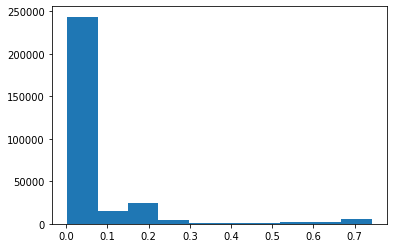

In [106]:
plt.hist(P_Cx)

In [107]:
precision_recall_gmm5 = metrics.precision_recall_curve(Y_gmm_test, P_Cx)
prec_rec_gmm5 = pd.DataFrame({'precision':precision_recall_gmm5[0][:-1], 'recall':precision_recall_gmm5[1][:-1],'threshold':precision_recall_gmm5[2]})
prec_rec_gmm5['F_beta'] = 1/((1/prec_rec_gmm5['precision'] + (beta**2)*(1/prec_rec_gmm5['recall']))/(1+beta**2))
prec_rec_gmm5.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
196809,0.679492,0.467333,0.254106,0.622932
196808,0.679444,0.467333,0.254068,0.622900
196810,0.679469,0.467285,0.254122,0.622900
196816,0.679545,0.467140,0.254404,0.622899
196811,0.679447,0.467236,0.254165,0.622868
...,...,...,...,...
210754,0.000000,0.000000,0.734950,0.000000
210753,0.000000,0.000000,0.734932,0.000000
210752,0.000000,0.000000,0.734127,0.000000
210751,0.000000,0.000000,0.733259,0.000000


In [109]:
AUC_ROC_gmm5 = metrics.roc_auc_score(Y_test,P_Cx)
AUC_ROC_gmm5

0.8561296156087298

In [110]:
# Naives Bayes
gnbs = []
for i in range(5):
    x_train_clus1 = x_gmm_train[Y_train_gmm5[:,i]>0.2]
    Y_train_clus1 = Y_gmm_train[Y_train_gmm5[:,i]>0.2]
    gnb = naive_bayes.GaussianNB()
    gnb.fit(x_train_clus1, Y_train_clus1)
    gnbs.append(gnb)

In [111]:
Y_predict_gmm5_gnb = []
for gnb in gnbs:
    Y_pred_gmm5_gnb = gnb.predict_proba(x_gmm_test)[:,1]
    Y_predict_gmm5_gnb.append(Y_pred_gmm5_gnb)


(array([155482.,  35787.,  18352.,  22202.,  21952.,  14288.,   5749.,
          5047.,   5817.,  16932.]),
 array([4.09021699e-153, 9.99881125e-002, 1.99976225e-001, 2.99964338e-001,
        3.99952450e-001, 4.99940563e-001, 5.99928675e-001, 6.99916788e-001,
        7.99904900e-001, 8.99893013e-001, 9.99881125e-001]),
 <a list of 10 Patch objects>)

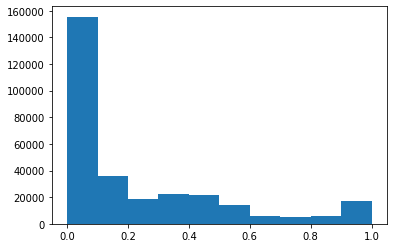

In [112]:
P_Ckx_gnb = np.array(Y_predict_gmm5_gnb)
P_Ckx_T_gnb = np.transpose(P_Ckx_gnb)
matrix_gnb = np.multiply(P_Ckx_T_gnb, Y_test_gmm5)
P_Cx_gnb = matrix_gnb.sum(axis = 1)
plt.hist(P_Cx_gnb)

In [113]:
precision_recall_gmm5_gnb = metrics.precision_recall_curve(Y_gmm_test, P_Cx_gnb)
prec_rec_gmm5_gnb = pd.DataFrame({'precision':precision_recall_gmm5_gnb[0][:-1], 'recall':precision_recall_gmm5_gnb[1][:-1],'threshold':precision_recall_gmm5_gnb[2]})
prec_rec_gmm5_gnb['F_beta'] = 1/((1/prec_rec_gmm5_gnb['precision'] + (beta**2)*(1/prec_rec_gmm5_gnb['recall']))/(1+beta**2))
prec_rec_gmm5_gnb.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
199482,0.693829,0.377855,0.943279,0.594415
199481,0.693767,0.377855,0.943242,0.594379
199483,0.693802,0.377807,0.943297,0.594375
199478,0.693671,0.377903,0.943204,0.594347
199480,0.693706,0.377855,0.943205,0.594343
...,...,...,...,...
210479,0.600000,0.000145,0.999881,0.000724
210480,0.500000,0.000097,0.999881,0.000483
210481,0.333333,0.000048,0.999881,0.000241
210482,0.000000,0.000000,0.999881,0.000000


In [114]:
AUC_ROC_gmm5_gnb = metrics.roc_auc_score(Y_test,P_Cx_gnb)
AUC_ROC_gmm5_gnb

0.8394867681920976

##### 10 Clusters

In [115]:
gmm10 = GaussianMixture(n_components=10)
gmm10.fit(x_gmm_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [116]:
Y_train_gmm10 = gmm10.predict_proba(x_gmm_train)

In [117]:
Y_test_gmm10 = gmm10.predict_proba(x_gmm_test)

In [120]:
# Logistic Regression
estimators = []
for i in range(10):
    x_train_clus1 = x_gmm_train[Y_train_gmm10[:,i]>0.1]
    Y_train_clus1 = Y_gmm_train[Y_train_gmm10[:,i]>0.1]
    if (len(Y_train_clus1.unique())==1) and Y_train_clus1.unique()[0]==0:
        estimators.append(0)
    elif (len(Y_train_clus1.unique())==1) and Y_train_clus1.unique()[0]==1:
        estimators.append(1)
    else:
        estimator = linear_model.LogisticRegression()
        estimator.fit(x_train_clus1, Y_train_clus1)
        estimators.append(estimator)

In [121]:
Y_predict_gmm10 = []
for estimator in estimators:
    if estimator ==0:
        Y_predict_gmm10.append(np.array([0]*len(x_gmm_test)))
    elif estimator ==1:
        Y_predict_gmm10.append(np.array([1]*len(x_gmm_test)))
    else:
        Y_pred_gmm10 = estimator.predict_proba(x_gmm_test)[:,1]
        Y_predict_gmm10.append(Y_pred_gmm10)

(array([245105.,  15388.,  22606.,   5249.,   1204.,   1306.,   1910.,
          1768.,   4526.,   2546.]),
 array([3.24278832e-121, 7.63497667e-002, 1.52699533e-001, 2.29049300e-001,
        3.05399067e-001, 3.81748834e-001, 4.58098600e-001, 5.34448367e-001,
        6.10798134e-001, 6.87147900e-001, 7.63497667e-001]),
 <a list of 10 Patch objects>)

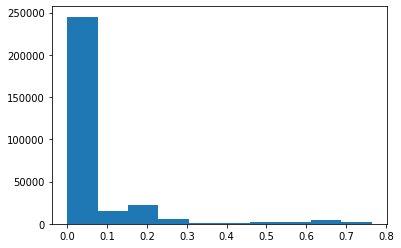

In [122]:
P_Ckx10 = np.array(Y_predict_gmm10)
P_Ckx10_T = np.transpose(P_Ckx10)
matrix10 = np.multiply(P_Ckx10_T, Y_test_gmm10)
P_Cx10 = matrix10.sum(axis = 1)
plt.hist(P_Cx10)

In [123]:
precision_recall_gmm10 = metrics.precision_recall_curve(Y_gmm_test, P_Cx10)
prec_rec_gmm10 = pd.DataFrame({'precision':precision_recall_gmm10[0][:-1], 'recall':precision_recall_gmm10[1][:-1],'threshold':precision_recall_gmm10[2]})
prec_rec_gmm10['F_beta'] = 1/((1/prec_rec_gmm10['precision'] + (beta**2)*(1/prec_rec_gmm10['recall']))/(1+beta**2))
prec_rec_gmm10.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
196341,0.681219,0.458883,0.263247,0.621038
196330,0.681040,0.459124,0.262618,0.621008
196332,0.681066,0.459076,0.262670,0.621007
196334,0.681092,0.459027,0.262758,0.621007
196336,0.681118,0.458979,0.262827,0.621006
...,...,...,...,...
209993,0.000000,0.000000,0.754968,0.000000
209992,0.000000,0.000000,0.754944,0.000000
209991,0.000000,0.000000,0.753171,0.000000
209990,0.000000,0.000000,0.752620,0.000000


In [124]:
AUC_ROC_gmm10 = metrics.roc_auc_score(Y_test,P_Cx10)
AUC_ROC_gmm10

0.8579655330509625

In [129]:
# Naive Bayes
gnbs = []
for i in range(10):
    x_train_clus1 = x_gmm_train[Y_train_gmm10[:,i]>0.1]
    Y_train_clus1 = Y_gmm_train[Y_train_gmm10[:,i]>0.1]
    if (len(Y_train_clus1.unique())==1) and Y_train_clus1.unique()[0]==0:
        gnbs.append(0)
    elif (len(Y_train_clus1.unique())==1) and Y_train_clus1.unique()[0]==1:
        gnbs.append(1)
    else:
        gnb = naive_bayes.GaussianNB()
        gnb.fit(x_train_clus1, Y_train_clus1)
        gnbs.append(gnb)

In [130]:
Y_predict_gmm10_gnb = []
for gnb in gnbs:
    if gnb ==0:
        Y_predict_gmm10_gnb.append(np.array([0]*len(x_gmm_test)))
    elif gnb ==1:
        Y_predict_gmm10_gnb.append(np.array([1]*len(x_gmm_test)))
    else:
        Y_pred_gmm10_gnb = gnb.predict_proba(x_gmm_test)[:,1]
        Y_predict_gmm10_gnb.append(Y_pred_gmm10_gnb)

(array([246098.,  21268.,   6585.,   5958.,   4979.,   2503.,    721.,
           949.,   1336.,  11211.]),
 array([7.90159500e-175, 9.99469469e-002, 1.99893894e-001, 2.99840841e-001,
        3.99787788e-001, 4.99734735e-001, 5.99681681e-001, 6.99628628e-001,
        7.99575575e-001, 8.99522522e-001, 9.99469469e-001]),
 <a list of 10 Patch objects>)

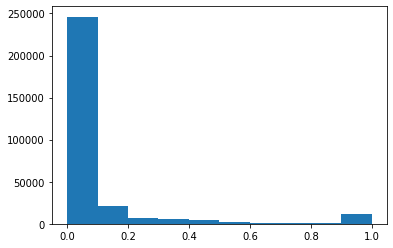

In [132]:
P_Ckx10_gnb = np.array(Y_predict_gmm10_gnb)
P_Ckx10_T_gnb = np.transpose(P_Ckx10_gnb)
matrix10_gnb = np.multiply(P_Ckx10_T_gnb, Y_test_gmm10)
P_Cx10_gnb = matrix10_gnb.sum(axis = 1)
plt.hist(P_Cx10_gnb)

In [133]:
precision_recall_gmm10_gnb = metrics.precision_recall_curve(Y_gmm_test, P_Cx10_gnb)
prec_rec_gmm10_gnb = pd.DataFrame({'precision':precision_recall_gmm10_gnb[0][:-1], 'recall':precision_recall_gmm10_gnb[1][:-1],'threshold':precision_recall_gmm10_gnb[2]})
prec_rec_gmm10_gnb['F_beta'] = 1/((1/prec_rec_gmm10_gnb['precision'] + (beta**2)*(1/prec_rec_gmm10_gnb['recall']))/(1+beta**2))
prec_rec_gmm10_gnb.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
196326,0.683076,0.458979,0.634498,0.622307
196325,0.683027,0.458979,0.634427,0.622275
196327,0.683053,0.458931,0.634673,0.622275
196335,0.683158,0.458738,0.636039,0.622273
196387,0.683846,0.457482,0.642503,0.622266
...,...,...,...,...
209950,0.857143,0.000290,0.999469,0.001447
209952,1.000000,0.000241,0.999469,0.001206
209953,1.000000,0.000193,0.999469,0.000965
209954,1.000000,0.000145,0.999469,0.000724


In [134]:
AUC_ROC_gmm10_gnb = metrics.roc_auc_score(Y_test,P_Cx10_gnb)
AUC_ROC_gmm10_gnb

0.8861407871292961

##### 20 Clusters

In [135]:
gmm20 = GaussianMixture(n_components=20)
gmm20.fit(x_gmm_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=20, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [136]:
Y_train_gmm20 = gmm20.predict_proba(x_gmm_train)
Y_test_gmm20 = gmm20.predict_proba(x_gmm_test)

In [137]:
estimators = []
for i in range(20):
    x_train_clus1 = x_gmm_train[Y_train_gmm20[:,i]>0.05]
    Y_train_clus1 = Y_gmm_train[Y_train_gmm20[:,i]>0.05]
    if (len(Y_train_clus1.unique())==1) and Y_train_clus1.unique()[0]==0:
        estimators.append(0)
    elif (len(Y_train_clus1.unique())==1) and Y_train_clus1.unique()[0]==1:
        estimators.append(1)
    else:
        estimator = linear_model.LogisticRegression()
        estimator.fit(x_train_clus1, Y_train_clus1)
        estimators.append(estimator)

In [138]:
# Logistic Regression
Y_predict_gmm20 = []
for estimator in estimators:
    if estimator ==0:
        Y_predict_gmm20.append(np.array([0]*len(x_gmm_test)))
    elif estimator ==1:
        Y_predict_gmm20.append(np.array([1]*len(x_gmm_test)))
    else:
        Y_pred_gmm20 = estimator.predict_proba(x_gmm_test)[:,1]
        Y_predict_gmm20.append(Y_pred_gmm20)

(array([238566.,  11217.,  14561.,  17644.,   7059.,   1821.,   2909.,
          5511.,   1616.,    704.]),
 array([3.23842074e-121, 7.10270261e-002, 1.42054052e-001, 2.13081078e-001,
        2.84108104e-001, 3.55135130e-001, 4.26162156e-001, 4.97189182e-001,
        5.68216209e-001, 6.39243235e-001, 7.10270261e-001]),
 <a list of 10 Patch objects>)

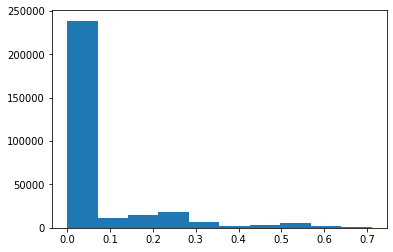

In [139]:
P_Ckx20 = np.array(Y_predict_gmm20)
P_Ckx20_T = np.transpose(P_Ckx20)
matrix20 = np.multiply(P_Ckx20_T, Y_test_gmm20)
P_Cx20 = matrix20.sum(axis = 1)
plt.hist(P_Cx20)

In [140]:
precision_recall_gmm20 = metrics.precision_recall_curve(Y_gmm_test, P_Cx20)
prec_rec_gmm20 = pd.DataFrame({'precision':precision_recall_gmm20[0][:-1], 'recall':precision_recall_gmm20[1][:-1],'threshold':precision_recall_gmm20[2]})
prec_rec_gmm20['F_beta'] = 1/((1/prec_rec_gmm20['precision'] + (beta**2)*(1/prec_rec_gmm20['recall']))/(1+beta**2))
prec_rec_gmm20.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
197545,0.684769,0.420735,0.348589,0.608407
197547,0.684798,0.420687,0.348599,0.608405
197549,0.684827,0.420638,0.348674,0.608404
197544,0.684715,0.420735,0.348528,0.608373
197546,0.684744,0.420687,0.348592,0.608371
...,...,...,...,...
209981,0.142857,0.000048,0.683928,0.000241
209980,0.125000,0.000048,0.681783,0.000241
209979,0.111111,0.000048,0.678917,0.000241
209978,0.100000,0.000048,0.677733,0.000241


In [141]:
AUC_ROC_gmm20 = metrics.roc_auc_score(Y_test,P_Cx20)
AUC_ROC_gmm20

0.8793923900464395

In [142]:
# Naive Bayes
gnbs = []
for i in range(20):
    x_train_clus1 = x_gmm_train[Y_train_gmm20[:,i]>0.05]
    Y_train_clus1 = Y_gmm_train[Y_train_gmm20[:,i]>0.05]
    if (len(Y_train_clus1.unique())==1) and Y_train_clus1.unique()[0]==0:
        gnbs.append(0)
    elif (len(Y_train_clus1.unique())==1) and Y_train_clus1.unique()[0]==1:
        gnbs.append(1)
    else:
        gnb = naive_bayes.GaussianNB()
        gnb.fit(x_train_clus1, Y_train_clus1)
        gnbs.append(gnb)

In [143]:
Y_predict_gmm20_gnb = []
for gnb in gnbs:
    if gnb ==0:
        Y_predict_gmm20_gnb.append(np.array([0]*len(x_gmm_test)))
    elif gnb ==1:
        Y_predict_gmm20_gnb.append(np.array([1]*len(x_gmm_test)))
    else:
        Y_pred_gmm20_gnb = gnb.predict_proba(x_gmm_test)[:,1]
        Y_predict_gmm20_gnb.append(Y_pred_gmm20_gnb)

(array([258149.,  12776.,   8053.,   4720.,   1952.,   1442.,   1286.,
          1680.,   2389.,   9161.]),
 array([7.89557232e-175, 9.99996248e-002, 1.99999250e-001, 2.99998874e-001,
        3.99998499e-001, 4.99998124e-001, 5.99997749e-001, 6.99997374e-001,
        7.99996998e-001, 8.99996623e-001, 9.99996248e-001]),
 <a list of 10 Patch objects>)

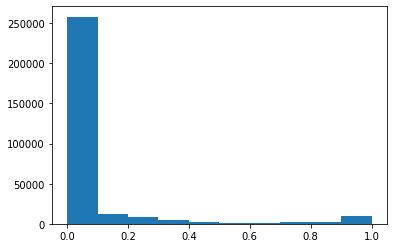

In [144]:
P_Ckx20_gnb = np.array(Y_predict_gmm20_gnb)
P_Ckx20_T_gnb = np.transpose(P_Ckx20_gnb)
matrix20_gnb = np.multiply(P_Ckx20_T_gnb, Y_test_gmm20)
P_Cx20_gnb = matrix20_gnb.sum(axis = 1)
plt.hist(P_Cx20_gnb)

In [145]:
precision_recall_gmm20_gnb = metrics.precision_recall_curve(Y_gmm_test, P_Cx20_gnb)
prec_rec_gmm20_gnb = pd.DataFrame({'precision':precision_recall_gmm20_gnb[0][:-1], 'recall':precision_recall_gmm20_gnb[1][:-1],'threshold':precision_recall_gmm20_gnb[2]})
prec_rec_gmm20_gnb['F_beta'] = 1/((1/prec_rec_gmm20_gnb['precision'] + (beta**2)*(1/prec_rec_gmm20_gnb['recall']))/(1+beta**2))
prec_rec_gmm20_gnb.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
190771,0.653941,0.615385,0.349326,0.645848
190772,0.653923,0.615336,0.349334,0.645823
190770,0.653907,0.615385,0.349326,0.645822
190773,0.653905,0.615288,0.349426,0.645799
190769,0.653874,0.615385,0.349291,0.645796
...,...,...,...,...
209926,0.000000,0.000000,0.999996,0.000000
209927,0.000000,0.000000,0.999996,0.000000
209928,0.000000,0.000000,0.999996,0.000000
209929,0.000000,0.000000,0.999996,0.000000


In [146]:
AUC_ROC_gmm20_gnb = metrics.roc_auc_score(Y_test,P_Cx20_gnb)
AUC_ROC_gmm20_gnb

0.9263431855395213

### 3) Ensemble Learning

##### Bagging Model

In [147]:
from sklearn import ensemble

In [163]:
# Random Forest
rforest = ensemble.RandomForestClassifier(n_estimators=100,class_weight = 'balanced', random_state=2020)

In [164]:
rforest.fit(x_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2020,
                       verbose=0, warm_start=False)

In [165]:
Y_pred_rforest = rforest.predict_proba(x_test)[:,1]
Y_pred_rforest

array([0.14, 0.  , 0.  , ..., 0.  , 0.26, 0.29])

In [166]:
precision_recall_rforest = metrics.precision_recall_curve(Y_test, Y_pred_rforest)
prec_rec_rforest = pd.DataFrame({'precision':precision_recall_rforest[0][:-1], 'recall':precision_recall_rforest[1][:-1],'threshold':precision_recall_rforest[2]})
prec_rec_rforest['F_beta'] = 1/((1/prec_rec_rforest['precision'] + (beta**2)*(1/prec_rec_rforest['recall']))/(1+beta**2))
prec_rec_rforest.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
6915,0.740608,0.527355,0.696734,0.685192
6913,0.740575,0.527404,0.696631,0.685186
6922,0.740688,0.527162,0.697638,0.685182
6916,0.740590,0.527307,0.696796,0.685164
6924,0.740703,0.527066,0.697723,0.685159
...,...,...,...,...
8212,0.833454,0.055580,0.999532,0.219380
8213,0.833212,0.055483,0.999644,0.219066
8214,0.834427,0.055242,0.999760,0.218379
8215,0.833943,0.055049,1.000000,0.217748


In [167]:
AUC_ROC_rforest = metrics.roc_auc_score(Y_test,Y_pred_rforest)
AUC_ROC_rforest

0.9195831834359369

##### Boosting model

In [172]:
# Gradient Boosting
gboost = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=2020)

In [173]:
gboost.fit(x_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2020, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [174]:
Y_pred_gboost = gboost.predict_proba(x_test)[:,1]
Y_pred_gboost

array([0.58474572, 0.00756552, 0.05175096, ..., 0.00259218, 0.44696312,
       0.54316977])

In [175]:
precision_recall_gboost = metrics.precision_recall_curve(Y_test, Y_pred_gboost)
prec_rec_gboost = pd.DataFrame({'precision':precision_recall_gboost[0][:-1], 'recall':precision_recall_gboost[1][:-1],'threshold':precision_recall_gboost[2]})
prec_rec_gboost['F_beta'] = 1/((1/prec_rec_gboost['precision'] + (beta**2)*(1/prec_rec_gboost['recall']))/(1+beta**2))
prec_rec_gboost.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
10817,0.796299,0.554783,0.647619,0.732521
10808,0.795564,0.556038,0.646728,0.732460
10813,0.795753,0.555556,0.647123,0.732420
10812,0.795712,0.555604,0.646839,0.732409
10809,0.795536,0.555942,0.646773,0.732407
...,...,...,...,...
12967,1.000000,0.002946,0.902568,0.014556
12968,1.000000,0.001545,0.904059,0.007679
12969,1.000000,0.001304,0.905095,0.006485
12970,1.000000,0.001255,0.906411,0.006246


In [176]:
AUC_ROC_gboost = metrics.roc_auc_score(Y_test, Y_pred_gboost)
AUC_ROC_gboost

0.9610636879832979

In [177]:
from xgboost import XGBClassifier

In [178]:
xgb = XGBClassifier()

In [179]:
xgb.fit(x_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
Y_pred_xgb = xgb.predict_proba(x_test)[:,1]
Y_pred_xgb

array([0.43395066, 0.00143589, 0.02561629, ..., 0.00084128, 0.5979459 ,
       0.6217072 ], dtype=float32)

In [182]:
precision_recall_xgb = metrics.precision_recall_curve(Y_test, Y_pred_xgb)
prec_rec_xgb = pd.DataFrame({'precision':precision_recall_xgb[0][:-1], 'recall':precision_recall_xgb[1][:-1],'threshold':precision_recall_xgb[2]})
prec_rec_xgb['F_beta'] = 1/((1/prec_rec_xgb['precision'] + (beta**2)*(1/prec_rec_xgb['recall']))/(1+beta**2))
prec_rec_xgb.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
54583,0.827484,0.537351,0.627489,0.746836
54584,0.827471,0.537303,0.627506,0.746809
54077,0.810323,0.568545,0.601482,0.746806
54528,0.825862,0.540007,0.624723,0.746798
54582,0.827422,0.537351,0.627422,0.746796
...,...,...,...,...
64113,1.000000,0.000241,0.993960,0.001206
64114,1.000000,0.000193,0.994389,0.000965
64115,1.000000,0.000145,0.994472,0.000724
64116,1.000000,0.000097,0.994712,0.000483


In [183]:
AUC_ROC_xgb = metrics.roc_auc_score(Y_test, Y_pred_xgb)
AUC_ROC_xgb

0.966770151965283

##### Stacking

In [184]:
from mlxtend.regressor import StackingCVRegressor


In [185]:
xgb = XGBClassifier()

In [187]:
#rforest = ensemble.RandomForestClassifier(n_estimators=100,random_state=2020)

In [213]:
#stack = StackingCVRegressor(regressors=(rforest, xgb), meta_regressor=xgb)

In [194]:
base_learners =[
                ('rforest', ensemble.RandomForestClassifier(n_estimators=10,random_state=2020)),
                ('xgb', XGBClassifier())
                ]

In [195]:
stack = ensemble.StackingClassifier(estimators=base_learners, final_estimator=XGBClassifier())

In [196]:
stack.fit(x_train, Y_train)

StackingClassifier(cv=None,
                   estimators=[('rforest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                

In [198]:
Y_pred_stack = stack.predict_proba(x_test)[:,1]

In [48]:
#beta = 1.465855118128441

In [199]:
precision_recall_stack = metrics.precision_recall_curve(Y_test, Y_pred_stack)
prec_rec_stack = pd.DataFrame({'precision':precision_recall_stack[0][:-1], 
                               'recall':precision_recall_stack[1][:-1],
                               'threshold':precision_recall_stack[2]})
prec_rec_stack['F_beta'] = 1/((1/prec_rec_stack['precision'] + 
                               (beta**2)*(1/prec_rec_stack['recall']))/(1+beta**2))
prec_rec_stack.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
4657,0.813296,0.561205,0.605916,0.746253
4633,0.810908,0.565744,0.602319,0.746233
4658,0.813283,0.561157,0.606564,0.746227
4659,0.813270,0.561109,0.606605,0.746202
4656,0.813033,0.561495,0.605726,0.746179
...,...,...,...,...
6936,1.000000,0.000579,0.998271,0.002891
6937,1.000000,0.000531,0.998392,0.002650
6938,1.000000,0.000386,0.998430,0.001929
6939,1.000000,0.000193,0.998438,0.000965


In [200]:
AUC_ROC_stack = metrics.roc_auc_score(Y_test, Y_pred_stack)
AUC_ROC_stack

0.9664039982445037

Random Forest has the lowest performance amongst the 3 models. XGBoost has slightly higher Precision but slightly lower Recall compared to Stacking (Random Forest & XGBoost). Stacking often improves the results when we combine weak learners but since Random Forest and XGBoost are already strong learners and their results are highly correlated, stack does not improve results much in this case.

## Part 3. Building Ensemble Models with External Data

getting external data<br/>
https://www.irs.gov/pub/irs-soi/16zpallagi.csv<br/>
more details:<br/>
https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi

In [201]:
f = open('16zpallagi.csv', 'r')
f.readline()
count = {}
for l in f.readlines():
    s = l.split(',')
    if s[2] == '0':
        count[s[1], int(s[3])] = int(s[4])
    else:
        count['%05d' % int(s[2]), int(s[3])] = int(s[4])
agg_count = {}
for k, v in count.items():
    if k[0][:3] not in agg_count:
        agg_count[k[0][:3]] = [0] * 7
    agg_count[k[0][:3]][k[1]] += v
f.close()

In [202]:
agg_count

{'AL': [0, 815440, 495830, 263390, 167190, 217440, 57240],
 '350': [0, 70090, 47260, 26950, 17310, 19810, 2960],
 '351': [0, 47320, 33330, 20910, 14000, 17580, 3100],
 '352': [0, 83800, 51790, 25110, 14780, 26570, 15840],
 '354': [0, 38000, 22690, 11200, 6990, 8820, 2170],
 '355': [0, 23680, 14990, 7850, 4660, 4330, 550],
 '356': [0, 62560, 38570, 21170, 13880, 16810, 3180],
 '357': [0, 35080, 22710, 14640, 11190, 20000, 4890],
 '358': [0, 35530, 19390, 10760, 7730, 13000, 3820],
 '359': [0, 49380, 29130, 14460, 8190, 7980, 1550],
 '360': [0, 48010, 29120, 15240, 10140, 12710, 1950],
 '361': [0, 38630, 22810, 10220, 5610, 7100, 2290],
 '362': [0, 29960, 19180, 10350, 5850, 5720, 830],
 '363': [0, 40730, 23470, 12250, 8170, 9820, 1960],
 '364': [0, 17530, 9700, 4830, 3080, 3100, 480],
 '365': [0, 62270, 37450, 22420, 15070, 19050, 4500],
 '366': [0, 53870, 27970, 13340, 7730, 9700, 3160],
 '367': [0, 21190, 10480, 4450, 2490, 2640, 270],
 '368': [0, 44590, 26960, 13030, 7960, 9810, 2410

In [203]:
count

{('AL', 1): 815440,
 ('AL', 2): 495830,
 ('AL', 3): 263390,
 ('AL', 4): 167190,
 ('AL', 5): 217440,
 ('AL', 6): 57240,
 ('35004', 1): 1510,
 ('35004', 2): 1410,
 ('35004', 3): 950,
 ('35004', 4): 650,
 ('35004', 5): 630,
 ('35004', 6): 60,
 ('35005', 1): 1310,
 ('35005', 2): 960,
 ('35005', 3): 450,
 ('35005', 4): 200,
 ('35005', 5): 180,
 ('35005', 6): 0,
 ('35006', 1): 430,
 ('35006', 2): 330,
 ('35006', 3): 190,
 ('35006', 4): 120,
 ('35006', 5): 130,
 ('35006', 6): 0,
 ('35007', 1): 4070,
 ('35007', 2): 2650,
 ('35007', 3): 1820,
 ('35007', 4): 1340,
 ('35007', 5): 1820,
 ('35007', 6): 240,
 ('35010', 1): 3620,
 ('35010', 2): 2070,
 ('35010', 3): 890,
 ('35010', 4): 530,
 ('35010', 5): 620,
 ('35010', 6): 180,
 ('35014', 1): 660,
 ('35014', 2): 460,
 ('35014', 3): 210,
 ('35014', 4): 140,
 ('35014', 5): 120,
 ('35014', 6): 30,
 ('35016', 1): 2810,
 ('35016', 2): 1730,
 ('35016', 3): 1060,
 ('35016', 4): 680,
 ('35016', 5): 720,
 ('35016', 6): 130,
 ('35019', 1): 360,
 ('35019', 2):

In [204]:
# Assume incomes bracketed are [12500, 37500, 62500, 87500, 150000, 400000]
# 1 = $1 under $25,000
# 2 = $25,000 under $50,000
# 3 = $50,000 under $75,000
# 4 = $75,000 under $100,000
# 5 = $100,000 under $200,000
# 6 = $200,000 or more

bracket_income = [0, 12500, 37500, 62500, 87500, 150000, 400000]
estimated_zip_income = {}
for k, v in agg_count.items():
    sumn, sumd = 0, 0
    for i in range(1, 7):
        sumn += bracket_income[i] * v[i]
        sumd += v[i]
    estimated_zip_income[k] = sumn / sumd

In [205]:
approved.insert(4, 'estimated_income', approved[['zip3', 'state']].apply(lambda x: estimated_zip_income[x[0]] if x[0] in estimated_zip_income else estimated_zip_income[x[1]] if x[1] in estimated_zip_income else 0, axis = 1))
rejected.insert(4, 'estimated_income', rejected[['zip3', 'state']].apply(lambda x: estimated_zip_income[x[0]] if x[0] in estimated_zip_income else estimated_zip_income[x[1]] if x[1] in estimated_zip_income else 0, axis = 1))
data_pos = approved.drop(['zip3', 'state'], axis = 1).values
data_neg = rejected.drop(['zip3', 'state'], axis = 1).values

##### Bagging

In [206]:
data = pd.concat([approved, rejected])

In [207]:
data.columns

Index(['amount', 'debt_to_income', 'zip3', 'state', 'estimated_income',
       'employ_length', 'reason_=_business', 'reason_=_car',
       'reason_=_credit_card', 'reason_=_debt_consolidation', 'reason_=_green',
       'reason_=_home_buying', 'reason_=_home_improvement',
       'reason_=_major_purchase', 'reason_=_medical',
       'reason_=_moving_relocation', 'reason_=_vacation', 'approved'],
      dtype='object')

In [228]:
data.head(20)

,amount,debt_to_income,zip3,state,estimated_income,employ_length,reason_=_business,reason_=_car,reason_=_credit_card,reason_=_debt_consolidation,reason_=_green,reason_=_home_buying,reason_=_home_improvement,reason_=_major_purchase,reason_=_medical,reason_=_moving_relocation,reason_=_vacation,approved
0,4500.0,0.2993,531,WI,71174.968260,6,0,0,1,0,0,0,0,0,0,0,0,1
1,9300.0,0.1612,481,MI,69568.913038,9,0,0,0,1,0,0,0,0,0,0,0,1
2,21500.0,0.2018,730,OK,71788.608588,10,0,0,0,1,0,0,0,0,0,0,0,1
3,14400.0,0.0660,070,NJ,84458.054521,9,0,0,0,0,0,0,1,0,0,0,0,1
4,11100.0,0.1891,902,CA,77252.046917,3,0,0,1,0,0,0,0,0,0,0,0,1
5,13400.0,0.3294,951,CA,99877.956116,5,0,0,0,0,0,0,1,0,0,0,0,1
6,10000.0,0.2993,703,LA,57321.737547,0,0,0,1,0,0,0,0,0,0,0,0,1
7,13000.0,0.1891,461,IN,65415.878123,10,0,0,1,0,0,0,0,0,0,0,0,1
8,10000.0,0.1624,927,CA,59318.908427,10,0,0,0,0,0,0,0,0,0,0,0,1
9,18000.0,0.3076,329,FL,64546.620837,2,0,0,0,1,0,0,0,0,0,0,0,1


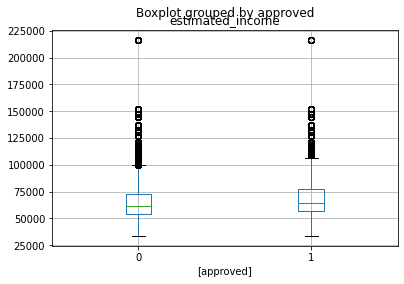

In [248]:
data[['estimated_income','approved']].boxplot(by='approved')

In [229]:
x = data[['amount', 'debt_to_income','estimated_income',
       'employ_length', 'reason_=_business', 'reason_=_car',
       'reason_=_credit_card', 'reason_=_debt_consolidation', 'reason_=_green',
       'reason_=_home_buying', 'reason_=_home_improvement',
       'reason_=_major_purchase', 'reason_=_medical',
       'reason_=_moving_relocation', 'reason_=_vacation']]
Y = data['approved']

In [230]:
x_train, x_test, Y_train, Y_test = model_selection.train_test_split(x, Y, test_size = 0.2, stratify=Y, random_state=2020)

In [231]:
rforest = ensemble.RandomForestClassifier(n_estimators=100,class_weight = 'balanced',random_state=2020)

In [232]:
rforest.fit(x_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2020,
                       verbose=0, warm_start=False)

In [233]:
Y_pred_rforest = rforest.predict_proba(x_test)[:,1]
Y_pred_rforest.shape

(301608,)

In [234]:
Y_test.shape

(301608,)

In [235]:
precision_recall_rforest = metrics.precision_recall_curve(Y_test, Y_pred_rforest)
prec_rec_rforest = pd.DataFrame({'precision':precision_recall_rforest[0][:-1], 'recall':precision_recall_rforest[1][:-1],'threshold':precision_recall_rforest[2]})
prec_rec_rforest['F_beta'] = 1/((1/prec_rec_rforest['precision'] + (beta**2)*(1/prec_rec_rforest['recall']))/(1+beta**2))
prec_rec_rforest.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
331,0.744335,0.615481,0.548958,0.714422
332,0.744321,0.615433,0.549313,0.714398
333,0.744306,0.615385,0.549644,0.714374
330,0.741059,0.624366,0.540000,0.714357
334,0.744291,0.615336,0.550000,0.714350
...,...,...,...,...
437,0.899123,0.019798,0.970000,0.090978
0,0.068662,1.000000,0.000000,0.084379
438,0.875969,0.010913,0.980000,0.051976
439,0.870968,0.005215,0.990000,0.025466


In [236]:
AUC_ROC_rforest = metrics.roc_auc_score(Y_test, Y_pred_rforest)
AUC_ROC_rforest

0.9408898813302929

##### Boosting

In [237]:
xgb = XGBClassifier()

In [238]:
xgb.fit(x_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [239]:
Y_pred_xgb = xgb.predict_proba(x_test)[:,1]

In [240]:
precision_recall_xgb = metrics.precision_recall_curve(Y_test, Y_pred_xgb)
prec_rec_xgb = pd.DataFrame({'precision':precision_recall_xgb[0][:-1], 'recall':precision_recall_xgb[1][:-1],'threshold':precision_recall_xgb[2]})
prec_rec_xgb['F_beta'] = 1/((1/prec_rec_xgb['precision'] + (beta**2)*(1/prec_rec_xgb['recall']))/(1+beta**2))
prec_rec_xgb.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
158419,0.796148,0.604810,0.584697,0.748771
158428,0.796273,0.604520,0.584930,0.748771
158420,0.796135,0.604761,0.584728,0.748748
158429,0.796260,0.604471,0.584934,0.748747
158993,0.804710,0.585784,0.601378,0.748744
...,...,...,...,...
172949,1.000000,0.000241,0.994173,0.001206
172950,1.000000,0.000193,0.995110,0.000965
172951,1.000000,0.000145,0.995215,0.000724
172952,1.000000,0.000097,0.995258,0.000483


In [241]:
AUC_ROC_xgb = metrics.roc_auc_score(Y_test, Y_pred_xgb)
AUC_ROC_xgb

0.966896739056236

##### Stacking

In [242]:
base_learners =[
                ('rforest', ensemble.RandomForestClassifier(n_estimators=10,random_state=2020)),
                ('xgb', XGBClassifier())
                ]

In [243]:
stack = ensemble.StackingClassifier(estimators=base_learners, final_estimator=XGBClassifier())

In [244]:
stack.fit(x_train, Y_train)

StackingClassifier(cv=None,
                   estimators=[('rforest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                

In [245]:
Y_pred_stack = stack.predict_proba(x_test)[:,1]

In [246]:
precision_recall_stack = metrics.precision_recall_curve(Y_test, Y_pred_stack)
prec_rec_stack = pd.DataFrame({'precision':precision_recall_stack[0][:-1], 
                               'recall':precision_recall_stack[1][:-1],
                               'threshold':precision_recall_stack[2]})
prec_rec_stack['F_beta'] = 1/((1/prec_rec_stack['precision'] + 
                               (beta**2)*(1/prec_rec_stack['recall']))/(1+beta**2))
prec_rec_stack.sort_values(by='F_beta', ascending=False)

,precision,recall,threshold,F_beta
2989,0.795955,0.602395,0.590584,0.747893
2988,0.795829,0.602492,0.590418,0.747833
2990,0.796079,0.601912,0.590927,0.747831
2991,0.796066,0.601864,0.591465,0.747807
2987,0.795528,0.603071,0.590314,0.747800
...,...,...,...,...
5200,1.000000,0.001159,0.995289,0.005768
5201,1.000000,0.000966,0.995346,0.004810
5202,1.000000,0.000724,0.995614,0.003611
5203,1.000000,0.000579,0.995851,0.002891


In [247]:
AUC_ROC_stack = metrics.roc_auc_score(Y_test, Y_pred_stack)
AUC_ROC_stack

0.9664304926333481

Random Forest has the lowest performance amongst the 3 models. XGBoost has slightly higher Precision but slightly lower Recall compared to Stacking (Random Forest & XGBoost). Stacking often improves the results when we combine weak learners but since Random Forest and XGBoost are already strong learners and their results are highly correlated, stack does not improve results much in this case. In addition, the models built with external data do not improve much compared with the models without external data because there is not much difference in estimated income of class 0 and class 1 (please see the box plot above.